### Script for reading data for Problem 5.1 (data_GlacierSizes.txt) in Applied Statistics 2023 problem set:

This script reads the file __"data_GlacierSizes.txt"__ for Problem 5.1 in the problem set of Applied Statistics 2023/24. This data files contains 433 entries in four columns: 

* **Area** of glacier
* **sigArea** i.e. uncertainty of Area of glacier
* **Volume** of glacier
* **sigVolume** i.e. uncertainty of Volume of glacier


####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 14th of October 2023 (latest version)

In [79]:
import pandas as pd
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax   # Useful functions to print fit results on figure
import statistics 
from scipy import stats
from sympy import *

In [28]:
dataframe = pd.read_csv('data_GlacierSizes.csv', header=0, index_col=None)
Area, sigArea, Volume, sigVolume = dataframe.values.T
dataframe

,Area,sigArea,Volume,sigVolume
0,2.44922,0.02758,0.10127,0.01091
1,2.48328,0.03630,0.10776,0.00834
2,1.54516,0.02648,0.04989,0.00349
3,2.45672,0.03140,0.06795,0.00104
4,1.45687,0.02270,0.03490,0.00312
...,...,...,...,...
429,2.08141,0.02792,0.10545,0.00791
430,1.76906,0.02897,0.05093,0.00681
431,1.59750,0.02184,0.06665,0.00568
432,1.95797,0.03534,0.06338,0.00384


### 5.1 (16 points) The file www.nbi.dk/petersen/data GlacierSizes.csv contains the estimated area and volume including uncertainties of 434 glaciers with an area above 1 km2.

Plot volume as a function of area. Which of the two have largest relative uncertainties?

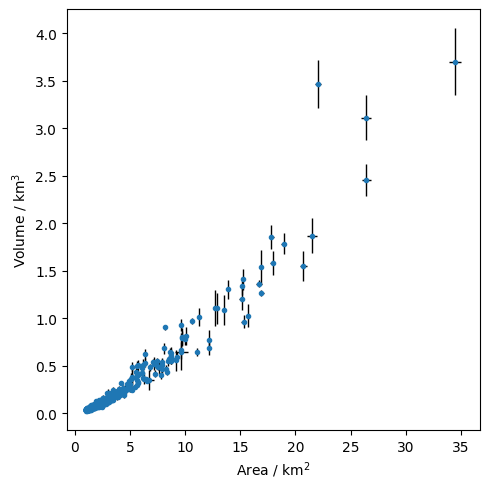

In [52]:
fig, ax = plt.subplots(figsize = (5, 5))

ax.errorbar(Area, Volume, yerr = sigVolume, xerr = sigArea, fmt = '.', ecolor = 'k', elinewidth = 1)

ax.set_xlabel('Area / km$^{2}$')
ax.set_ylabel('Volume / km$^{3}$')

fig.tight_layout()
fig.savefig('vol_vs_area_prop5')
plt.show() 

In [30]:
erel_area = sigArea / Area
erel_volume = sigVolume / Volume

print('Mean relative error on area:', erel_area.mean())
print('Mean relative error on volume:', erel_volume.mean())

Mean relative error on area: 0.013281048830950434
Mean relative error on volume: 0.10065155981461331



Fit data with the expected Area-Volume relation V $\sim$ A $^{3/2}$. Assume no area uncertainties.

In [74]:
Minuit.print_level = 0

y = Volume
ey = sigVolume
x = Area

def fit_func(x, a, b):
    return a * x**(3/2) + b

# Alternatively, you can define Chi2 calculation:
def chi2_owncalc(a, b) :
    y_fit = fit_func(x, a, b)
    chi2 = np.sum(((y - y_fit) / ey)**2)
    return chi2
chi2_owncalc.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit = Minuit(chi2_owncalc, a = 1.0, b = 0.0) # initial guess

# Perform the actual fit:
minuit.migrad()

Nvar = 2                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2_fit = minuit.fval                          # The chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom

print(Prob_fit)

0.0


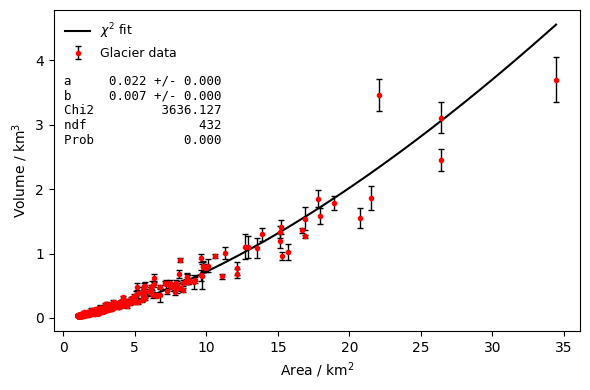

In [68]:
fig, ax = plt.subplots(figsize=(6,4))
x_plot = np.linspace(min(x), max(x), 1000)

ax.plot(x_plot, fit_func(x_plot, *minuit.values[:]), '-k', zorder = -10, label = '$\chi^{2}$ fit')     # Note how we can "smartly" input the fit values!
ax.errorbar(x, y, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1, label = 'Glacier data')
ax.legend(frameon = False, fontsize = 9)

d = {'a':   [minuit.values[0], minuit.errors[0]],
     'b':   [minuit.values[1], minuit.errors[1]],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_fit,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.8, text, ax, fontsize=9)

ax.set_ylabel('Volume / km$^{3}$')
ax.set_xlabel('Area / km$^{2}$')

fig.tight_layout()
fig.savefig("Area_volume_relation.png", dpi = 150)

Are you satisfied with the fit? And if not, point out its specific deficiencies.

In [ ]:
# Chi2 is about 10 times larger than ndf and probability is 0, therefore I am not satisfied with the fit
# Uikkerhederne er for små i forhold til variationen i dataen

Fit again with improved functional form(s), and quantify the improvements.

In [73]:
Minuit.print_level = 0

y = Volume
ey = sigVolume
x = Area

def fit_func(x, a, b, c):
    return a * x**c + b

# Alternatively, you can define Chi2 calculation:
def chi2_owncalc(a, b, c) :
    y_fit = fit_func(x, a, b, c)
    chi2 = np.sum(((y - y_fit) / ey)**2)
    return chi2
chi2_owncalc.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit = Minuit(chi2_owncalc, a = 1.0, b = 0.0, c = 3/2) # initial guess

# Perform the actual fit:
minuit.migrad()

Nvar = 3                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2_fit = minuit.fval                          # The chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom

print(Prob_fit)

0.0


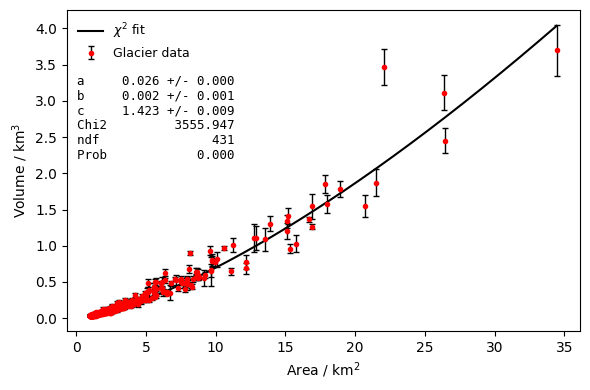

In [72]:
fig, ax = plt.subplots(figsize=(6,4))
x_plot = np.linspace(min(x), max(x), 1000)

ax.plot(x_plot, fit_func(x_plot, *minuit.values[:]), '-k', zorder = -10, label = '$\chi^{2}$ fit')     # Note how we can "smartly" input the fit values!
ax.errorbar(x, y, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1, label = 'Glacier data')
ax.legend(frameon = False, fontsize = 9)

d = {'a':   [minuit.values[0], minuit.errors[0]],
     'b':   [minuit.values[1], minuit.errors[1]],
     'c':   [minuit.values[2], minuit.errors[2]],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_fit,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.8, text, ax, fontsize=9)

ax.set_ylabel('Volume / km$^{3}$')
ax.set_xlabel('Area / km$^{2}$')

fig.tight_layout()
fig.savefig("Improved_relation.png", dpi = 150)

In [ ]:
# probability of 0 in both cases, which makes me unable to quantify the improvements

Redo this fit including the uncertainties in area. How large is the effect of including these?

What volume and with what uncertainty would you expect a glacier of area 0.5 km $^{2}$ to have?

In [81]:
Minuit.print_level = 0

y = Volume
ey = sigVolume * 3
x = Area

def fit_func(x, a, b, c):
    return a * x**c + b

# Alternatively, you can define Chi2 calculation:
def chi2_owncalc(a, b, c) :
    y_fit = fit_func(x, a, b, c)
    chi2 = np.sum(((y - y_fit) / ey)**2)
    return chi2
chi2_owncalc.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit = Minuit(chi2_owncalc, a = 1.0, b = 0.0, c = 3/2) # initial guess

# Perform the actual fit:
minuit.migrad()

Nvar = 3                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2_fit = minuit.fval                          # The chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom

print(Prob_fit)
print(minuit.values)
print(minuit.errors)

0.8916591597019099
<ValueView a=0.02619854510927105 b=0.0024943220951972244 c=1.42306072147425>
<ErrorView a=0.0014150046488308214 b=0.0019832028861960223 c=0.026212384207159625>


In [80]:
# Define variables:
a, b, c, x, y = symbols('a, b, c, x, y')
da, db, dc, dx, dy = symbols('sigma_a, sigma_b, sigma_c, sigma_x, sigma_y')

# Define relation:
y = a * x**c + b

# Calculate uncertainty:
dy = sqrt((y.diff(a) * da)**2 + (y.diff(b) * db)**2 + (y.diff(c) * dc)**2 + (y.diff(x) * dx)**2)

# Turn expression into numerical functions 
# lambdify transform SymPy expressions to lambda functions which can be used to calculate numerical values very fast
fy = lambdify((a, b, c, x), y)
fdy = lambdify((a, da, b, db, c, dc, x, dx), dy)

# Define values and their errors
va, vda = minuit.values[0], minuit.errors[0]
vb, vdb = minuit.values[1], minuit.errors[1]
vc, vdc = minuit.values[2], minuit.errors[2]
vx, vdx = 0.5, 0
    
# Numerically evaluate expressions and print 
vy = fy(va, vb, vc, vx)
vdy = fdy(va, vda, vb, vdb, vc, vdc, vx, vdx)

print(vy, '+-', vdy)

0.01226429167277895 +- 0.002059867521887546
